In [10]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Data Import
 - Import pickled data files from the DataCleanup folder and check that they look as they shoud

In [11]:
ExpandedTop50 = pd.read_pickle("../DataCleanup/ExpandedCutTop50.pkl")
CollapsedTop50 = pd.read_pickle("../DataCleanup/CollapsedUncutTop50.pkl")
ExpandedTop50.head()

index  AvgRating       CityName  \
0      0        5.0  New York City   
1      0        5.0  New York City   
2      0        5.0  New York City   
3      0        5.0  New York City   
5      1        5.0  New York City   

                                        CuisinesList  NumReviews  Price  \
0  [Pizza, Vegetarian Friendly, Vegan Options, Gl...       251.0    2.0   
1  [Pizza, Vegetarian Friendly, Vegan Options, Gl...       251.0    2.0   
2  [Pizza, Vegetarian Friendly, Vegan Options, Gl...       251.0    2.0   
3  [Pizza, Vegetarian Friendly, Vegan Options, Gl...       251.0    2.0   
5  [French, Vegetarian Friendly, Vegan Options, G...       273.0    3.0   

                RestaurantName      StateName              Cuisine  
0           SottoCasa Pizzeria  New York (NY)                Pizza  
1           SottoCasa Pizzeria  New York (NY)  Vegetarian Friendly  
2           SottoCasa Pizzeria  New York (NY)        Vegan Options  
3           SottoCasa Pizzeria  New York (NY)  Gluten Free Options  
5  Boucherie Park Avenue South  New York (NY)               French

- Let's remove the "CuisinesList" column from our analysis since it is now unnecessary

In [12]:
del ExpandedTop50['CuisinesList']
ExpandedTop50.head()

index  AvgRating       CityName  NumReviews  Price  \
0      0        5.0  New York City       251.0    2.0   
1      0        5.0  New York City       251.0    2.0   
2      0        5.0  New York City       251.0    2.0   
3      0        5.0  New York City       251.0    2.0   
5      1        5.0  New York City       273.0    3.0   

                RestaurantName      StateName              Cuisine  
0           SottoCasa Pizzeria  New York (NY)                Pizza  
1           SottoCasa Pizzeria  New York (NY)  Vegetarian Friendly  
2           SottoCasa Pizzeria  New York (NY)        Vegan Options  
3           SottoCasa Pizzeria  New York (NY)  Gluten Free Options  
5  Boucherie Park Avenue South  New York (NY)               French

### Preliminary cuisine analysis and cleanup
- Let's take a look at the counts of each specific cuisine. We will then make a decision as to which rows (too underrepresented) we need to eliminate, and also, some categories which could potentially be combined for the purposes of analysis.

- One prelimimary question - and for this one, we need to use the Collapsed Top 50 dataset (because for this first question, we only want one line per restaurant). Do different cities have a different number of TripAdvisor reviews per restaurant? Theoretically, they wouldn't, bigger cities would simply have more restaurants. It looks like this is not the case, though!

- It would appear to me that more "touristy" cities have more average reviews per restaurant. This may be particulary true of Trip Advisor, which markets itself as a tool to plan vacations.

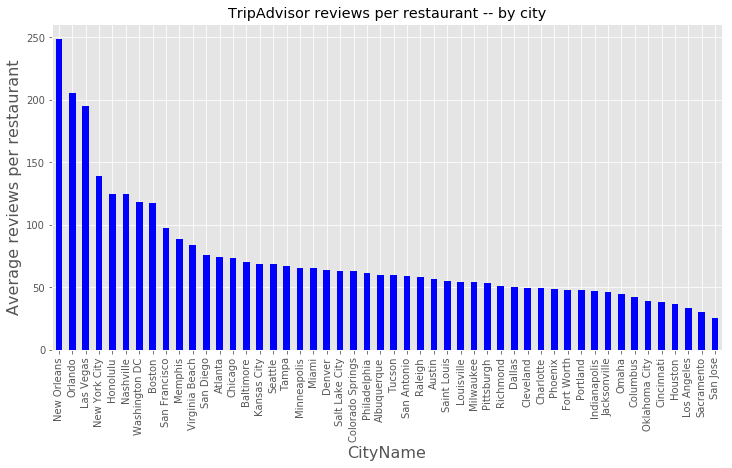

In [13]:
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,6))
plt.ylabel('Average reviews per restaurant', fontsize=16)
plt.xlabel('City Name', fontsize=16)
plt.title('TripAdvisor reviews per restaurant -- by city')
CollapsedTop50.groupby('CityName')['NumReviews'].mean().sort_values(ascending=False).plot.bar(color='b')

In [14]:
Top50CuisinesGroup = ExpandedTop50.groupby('Cuisine')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Top50CuisinesGroup.count().sort_values('RestaurantName', ascending=False))

                     index  AvgRating  CityName  NumReviews  Price  \
Cuisine                                                              
American             27879      27879     27879       26797  24224   
Vegetarian Friendly  21016      21016     21016       20977  20823   
Vegan Options        11195      11195     11195       11178  11110   
Bar                  11141      11141     11141       11049  10589   
Gluten Free Options  11020      11020     11020       11019  11016   
Asian                 9447       9447      9447        9226   8466   
Pub                   8599       8599      8599        8325   7446   
Mexican               8525       8525      8525        7645   5448   
Pizza                 7500       7500      7500        6753   5023   
Italian               7193       7193      7193        6974   6221   
Fast Food             5842       5842      5842        5691   5284   
Chinese               5145       5145      5145        4669   3145   
Japanese            

- Let's replace some of the cuisine names (combine South American and Middle Eastern cuisines, for example), then decide what the cutoff should be to include a cuisine in the analysis

In [15]:
StartList = ["Latin", "Thai", "Cuban", "South American", "Central American", "Turkish", "Lebanese", "Colombian", "Pakistani", "Jamaican", "Vietnamese", "Halal", "Peruvian", "Brazilian", "Mexican", "Venezuelan", "Malaysian", "Salvadoran", "Afghani", "Arabic", "Bahamian"]
ReplaceList = ["Latin American", "Thai/SE Asian", "Caribbean", "South American", "Mexican/Central American", "Middle Eastern", "Middle Eastern", "South American", "Middle Eastern", "Caribbean", "Thai/SE Asian", "Middle Eastern", "South American", "South American", "Mexican/Central American", "Venezuelan", "Thai/SE Asian", "Mexican/Central American", "Middle Eastern", "Middle Eastern", "Caribbean"]
ExpandedTop50Modified = ExpandedTop50.copy()
ExpandedTop50Modified['Cuisine'] = ExpandedTop50['Cuisine'].replace(StartList, ReplaceList).copy()

In [16]:
Top50CuisinesGroupModified = ExpandedTop50Modified.groupby('Cuisine')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Top50CuisinesGroupModified.count().sort_values('RestaurantName', ascending=False))

                          index  AvgRating  CityName  NumReviews  Price  \
Cuisine                                                                   
American                  27879      27879     27879       26797  24224   
Vegetarian Friendly       21016      21016     21016       20977  20823   
Vegan Options             11195      11195     11195       11178  11110   
Bar                       11141      11141     11141       11049  10589   
Gluten Free Options       11020      11020     11020       11019  11016   
Asian                      9447       9447      9447        9226   8466   
Mexican/Central American   8887       8887      8887        7989   5768   
Pub                        8599       8599      8599        8325   7446   
Pizza                      7500       7500      7500        6753   5023   
Italian                    7193       7193      7193        6974   6221   
Fast Food                  5842       5842      5842        5691   5284   
Chinese                  

 - Based on this data, I have chosen the cutoff as "French" (1187 total restaurants and a cuisine people are familiar with), which will give us a total of 32 cuisines to analyze. Let's remove cuisines below this quantity:

In [17]:
Top50Finalized = ExpandedTop50Modified.groupby('Cuisine').filter(lambda x: len(x) > 1175)
Top50FinalizedGroup = Top50Finalized.groupby('Cuisine')
Top50FinalizedGroupCities = Top50Finalized.groupby('CityName')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(Top50FinalizedGroup.count().sort_values('RestaurantName', ascending=False))

                          index  AvgRating  CityName  NumReviews  Price  \
Cuisine                                                                   
American                  27879      27879     27879       26797  24224   
Vegetarian Friendly       21016      21016     21016       20977  20823   
Vegan Options             11195      11195     11195       11178  11110   
Bar                       11141      11141     11141       11049  10589   
Gluten Free Options       11020      11020     11020       11019  11016   
Asian                      9447       9447      9447        9226   8466   
Mexican/Central American   8887       8887      8887        7989   5768   
Pub                        8599       8599      8599        8325   7446   
Pizza                      7500       7500      7500        6753   5023   
Italian                    7193       7193      7193        6974   6221   
Fast Food                  5842       5842      5842        5691   5284   
Chinese                  

- Finally, let's remove any duplicate entries that we may have created when we combined similar cuisinet types. We can check the length to prove we have eliminated some duplicates.

In [18]:
#Finally, we should remove any duplicate cuisine entries we may have created by generating the modified list: We are now finally ready to plot and analyze
print(len(Top50Finalized))
Top50Finalized = Top50Finalized.drop_duplicates(keep=False).copy()
print(len(Top50Finalized))

182979
178684


### GroupBy objects and preliminary analysis
- Let's create some groupby objects (Cuisine, CityName, and dual CityName/Cuisine), which may be useful for our future analysis, and update our Pyplot settings

In [19]:
Top50ByCuisine = Top50Finalized.groupby('Cuisine')
Top50ByCity = Top50Finalized.groupby('CityName')
Top50ByCityCuisine = Top50Finalized.groupby(['CityName', 'Cuisine'])
print(Top50ByCuisine.count().head())

          index  AvgRating  CityName  NumReviews  Price  RestaurantName  \
Cuisine                                                                   
American  27879      27879     27879       26797  24224           27879   
Asian      9447       9447      9447        9226   8466            9447   
Bar       11141      11141     11141       11049  10589           11141   
Barbecue   2106       2106      2106        1945   1570            2106   
Cafe       4082       4082      4082        3913   3598            4082   

          StateName  
Cuisine              
American      27879  
Asian          9447  
Bar           11141  
Barbecue       2106  
Cafe           4082  


In [21]:
CitySizeSeries = Top50ByCuisine.size()
CitySizeSeries
#This analysis reveals that, after removing duplicates, Caribbean and South American have now become the smallest included groups. Let's keep them, but consider this going forward if we want to analyze these cuisines.

Cuisine
American                    27879
Asian                        9447
Bar                         11141
Barbecue                     2106
Cafe                         4082
Caribbean                     387
Chinese                      5145
Deli                         1707
Diner                        1540
Fast Food                    5842
French                       1187
Gluten Free Options         11020
Greek                        1429
Indian                       1333
Italian                      7193
Japanese                     4196
Latin American               2743
Mediterranean                2774
Mexican/Central American     8540
Middle Eastern                992
Pizza                        7500
Pub                          8599
Seafood                      4005
Soups                        1658
South American                597
Southwestern                 1769
Spanish                      2528
Steakhouse                   1943
Sushi                        3766
Thai/S

- Let's create our first graphic. Let's look at the overall (among the entire set of 50 cities) distribution of each cuisine.

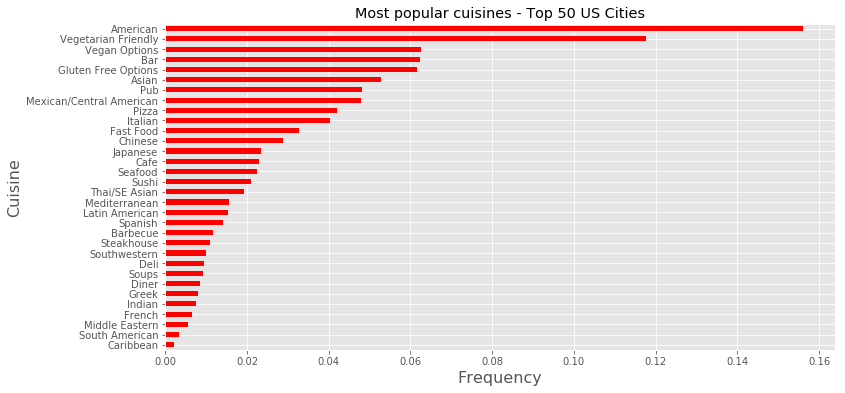

In [26]:
plt.figure(figsize=(12,6))
plt.ylabel('Cuisine', fontsize=16)
plt.xlabel('Frequency', fontsize=16)
plt.title('Most popular cuisines - Top 50 US Cities')
CuisineFrequencySeries = Top50ByCuisine.size()/178684
CuisineFrequencySeries.sort_values().plot.barh(color='r')

- We can also look at the distribution for any particular city! This is one way to visualize this. We see in NYC, more vegetarian/vegan retaurants, more Italian restaurants -- fewer barbecue and Southwestern restaurants, for example.

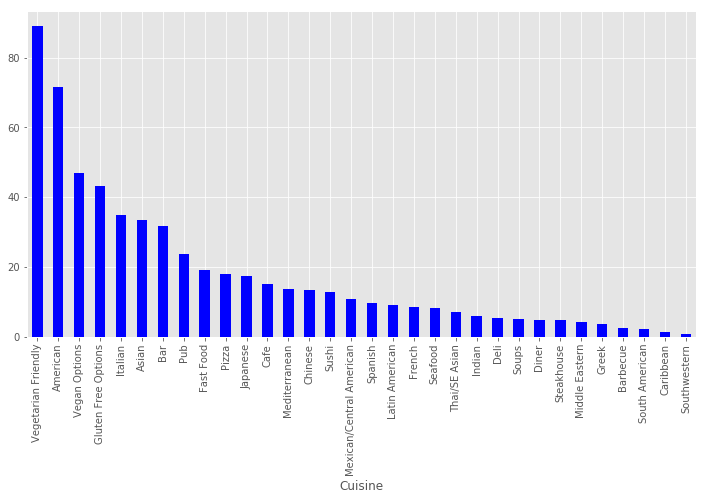

In [27]:
plt.figure(figsize=(12,6))
Top50NYByCuisine = Top50Finalized.query('CityName == "New York City"').groupby('Cuisine')
CuisineFrequencySeriesNY = Top50NYByCuisine.size()/len(Top50NYByCuisine)
CuisineFrequencySeriesNY.sort_values(ascending=False).plot.bar(color='b')

- Here, I want to create new Pandas dataframes containing data specific for Cuisines vs CityType. I will generate DF's of restaurant count, the frequency of that type of restaurant in each specific city, and finally, the relative frequency of that cuisine within the city (normalized to 1). This will help with our data visualization.

In [34]:
CityList = list(Top50Finalized['CityName'].unique())
CuisinesList = list(Top50Finalized['Cuisine'].unique())

FrequencyDFIndividualCities=pd.DataFrame({'Overall': CuisineFrequencySeries})
CountDFIndividualCities = pd.DataFrame({'Overall': Top50ByCuisine.size()})
RelFreqDFIndividualCities = pd.DataFrame(index=CuisinesList)

for i in range(len(CityList)):
    CountSeries = pd.Series(np.zeros(len(CuisinesList)), index=CuisinesList)
    FreqSeries = pd.Series(np.zeros(len(CuisinesList)), index=CuisinesList)
    RelFreqSeries = pd.Series(np.zeros(len(CuisinesList)), index=CuisinesList)
    Top50FinalizedI = Top50Finalized[Top50Finalized['CityName']==CityList[i]]
    for j in range(len(CuisinesList)):
        CountIJ = len(Top50FinalizedI[Top50FinalizedI['Cuisine']==CuisinesList[j]])
        FreqIJ = CountIJ/len(Top50FinalizedI)
        RelFreqIJ = FreqIJ/CuisineFrequencySeries[CuisinesList[j]]
        CountSeries[j]=CountIJ
        FreqSeries[j]=FreqIJ
        RelFreqSeries[j]=RelFreqIJ
    FrequencyDFIndividualCities[CityList[i]]=FreqSeries
    CountDFIndividualCities[CityList[i]]=CountSeries
    RelFreqDFIndividualCities[CityList[i]]=RelFreqSeries
    
#Let's visualize the head of the relative frequency data frame.
RelFreqDFIndividualCities.head()

New York City  Los Angeles   Chicago   Houston  \
Pizza                     0.743834     1.064799  1.076639  0.822572   
Vegetarian Friendly       1.306175     0.795340  0.919711  0.831060   
Vegan Options             1.296163     0.814734  0.910600  0.679408   
Gluten Free Options       1.205706     0.584240  0.942369  0.741323   
French                    2.216005     1.425545  0.946306  1.234081   

                     San Francisco  Las Vegas  San Antonio  Philadelphia  \
Pizza                     0.743238   0.954800     1.119884      1.241785   
Vegetarian Friendly       1.112062   0.998507     0.748591      0.930630   
Vegan Options             1.039250   1.225430     0.719790      0.879462   
Gluten Free Options       0.972221   1.230609     0.731220      0.857208   
French                    1.615635   0.795541     0.682450      1.270330   

                     Portland     Miami    ...      Oklahoma City  Milwaukee  \
Pizza                0.905771  1.067329    ...           0.979282   1.305870   
Vegetarian Friendly  0.977567  0.886536    ...           0.753873   0.845351   
Vegan Options        1.062844  0.949216    ...           0.665434   0.823993   
Gluten Free Options  0.975113  0.739148    ...           0.742650   0.971424   
French               0.971188  1.419761    ...           0.707148   0.479714   

                     Colorado Springs  Virginia Beach   Memphis   Raleigh  \
Pizza                        0.972702        1.412673  0.911493  1.264320   
Vegetarian Friendly          1.003346        0.976491  0.880514  1.005798   
Vegan Options                1.097992        0.946409  0.736988  0.970545   
Gluten Free Options          1.051949        1.048054  0.844952  1.003884   
French                       0.841913        0.080414  0.595781  0.748926   

                     Salt Lake City  Kansas City     Omaha  San Diego  
Pizza                      0.770341     1.098294  1.551504   0.882898  
Vegetarian Friendly        1.074657     0.954748  0.857149   0.966465  
Vegan Options              1.210450     1.047090  0.729591   0.996034  
Gluten Free Options        1.239205     1.092468  0.802096   0.971377  
French                     0.088497     0.444841  0.659824   0.924941  

[5 rows x 50 columns]

- Now we have many options to visualize our data. Of particular use if the relative frequency table. For example, we can choose a cuisine (for example, French), and see which cities have abnormally high numbers of these restaurants (RF > 1), and which cities have underrepresentation of these cuisines (RF < 1).

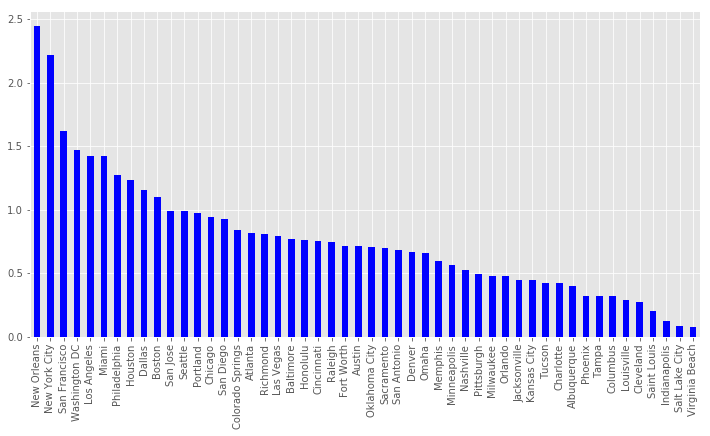

In [35]:
plt.figure(figsize=(12,6))

RelFreqDFIndividualCities.loc['French'].sort_values(ascending=False).plot.bar(color='b')

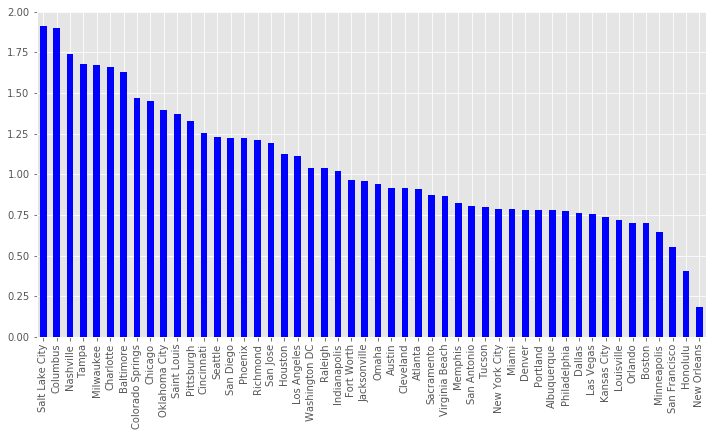

In [96]:
#How about Greek restaurants?
plt.figure(figsize=(12,6))

RelFreqDFIndividualCities.loc['Greek'].sort_values(ascending=False).plot.bar(color='b')

- Using this relative dataframe, we can also take a city and determine which cuisines are overrepresented and underrepresented, and which cuisines are most highly rated in a particular city.

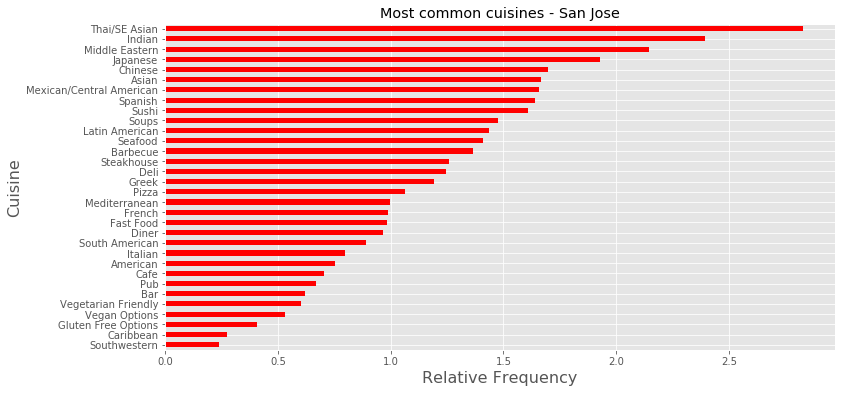

In [57]:
plt.figure(figsize=(12,6))
plt.ylabel('Cuisine', fontsize=16)
plt.xlabel('Relative Frequency', fontsize=16)
plt.title('Most common cuisines - San Jose')
RelFreqDFIndividualCities['San Jose'].sort_values().plot.barh(color='r')

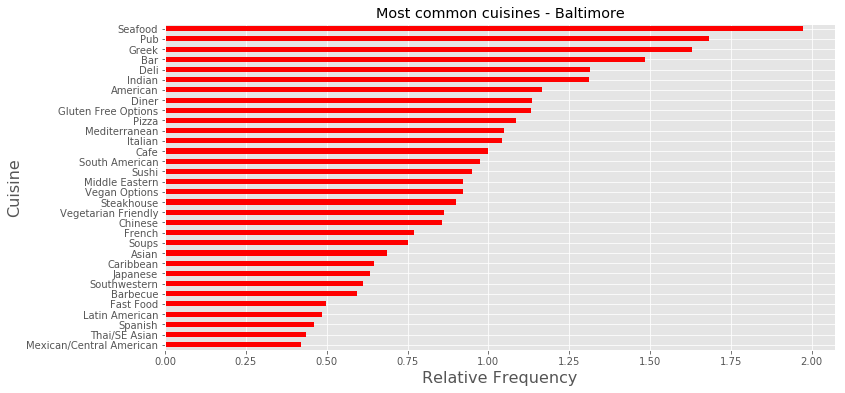

In [76]:
plt.figure(figsize=(12,6))
plt.ylabel('Cuisine', fontsize=16)
plt.xlabel('Relative Frequency', fontsize=16)
plt.title('Most common cuisines - Baltimore')
RelFreqDFIndividualCities['Baltimore'].sort_values().plot.barh(color='r')

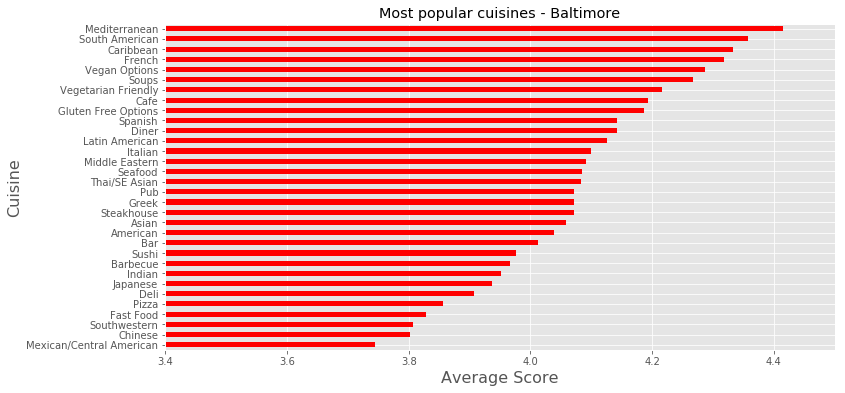

In [97]:
plt.figure(figsize=(12,6))
plt.ylabel('Cuisine', fontsize=16)
plt.xlabel('Average Score', fontsize=16)
plt.title('Most popular cuisines - Baltimore')
plt.xlim(3.4, 4.5)
AvgRatingDFIndividualCities['Baltimore'].sort_values().plot.barh(color='r')

- I also want to create a Pandas DF comparing City Name with Cuisine, but in this DF, I want to have the average rating for a restaurant in that city with that cuisine. This is a bit trickier to make, but works, as we can see from 

In [41]:
OverallCuisineRatings = Top50Finalized.groupby('Cuisine')['AvgRating'].mean()
AvgRatingDFIndividualCities=pd.DataFrame()
for i in range(len(CityList)):
    AvgRatingSeries = pd.Series(np.zeros(len(CuisinesList)), index=CuisinesList)
    Top50FinalizedI = Top50Finalized[Top50Finalized['CityName']==CityList[i]]
    for j in range(len(CuisinesList)):
        AvgRatingIJ = Top50FinalizedI[Top50Finalized['Cuisine']==CuisinesList[j]]['AvgRating'].mean()
        AvgRatingSeries[j]=AvgRatingIJ
    AvgRatingDFIndividualCities[CityList[i]]=AvgRatingSeries

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:

In [43]:
AvgRatingDFIndividualCities.head()

New York City  Los Angeles   Chicago   Houston  \
Pizza                     4.088083     4.062016  4.020997  3.792237   
Vegetarian Friendly       4.201474     4.269136  4.276864  4.210484   
Vegan Options             4.237052     4.322398  4.300416  4.287037   
Gluten Free Options       4.227701     4.261218  4.300000  4.277586   
French                    4.197802     4.164634  4.122642  4.086538   

                     San Francisco  Las Vegas  San Antonio  Philadelphia  \
Pizza                     3.944954   3.965201     3.804569      4.023810   
Vegetarian Friendly       4.238512   4.202500     4.168022      4.226757   
Vegan Options             4.280220   4.242830     4.240741      4.288288   
Gluten Free Options       4.255370   4.234043     4.224868      4.267606   
French                    4.213333   4.375000     4.289474      4.205882   

                     Portland     Miami    ...      Oklahoma City  Milwaukee  \
Pizza                4.048485  3.976608    ...           3.785714   3.877907   
Vegetarian Friendly  4.311623  4.248744    ...           4.298013   4.253205   
Vegan Options        4.371972  4.317181    ...           4.387324   4.358025   
Gluten Free Options  4.319923  4.290230    ...           4.301282   4.292553   
French               4.482143  4.236111    ...           4.187500   3.800000   

                     Colorado Springs  Virginia Beach   Memphis   Raleigh  \
Pizza                        4.020548        3.860360  3.810345  3.875000   
Vegetarian Friendly          4.206161        4.246512  4.181529  4.198598   
Vegan Options                4.231707        4.319820  4.292857  4.272727   
Gluten Free Options          4.228448        4.268595  4.265823  4.241071   
French                       4.400000        5.000000  4.083333  4.111111   

                     Salt Lake City  Kansas City     Omaha  San Diego  
Pizza                      3.872727     3.910256  3.836538   4.132124  
Vegetarian Friendly        4.281395     4.265789  4.229814   4.285473  
Vegan Options              4.364341     4.342342  4.287671   4.329231  
Gluten Free Options        4.257692     4.315789  4.253165   4.299679  
French                     4.000000     4.200000  4.285714   4.265625  

[5 rows x 50 columns]

- Now, we can select a particular cuisine and see which cities have the highest ratings for that cuisine. San Diego is the pizza capital of America?? This is for over 190 pizza restaurants in the city, so the data is fairly robust!

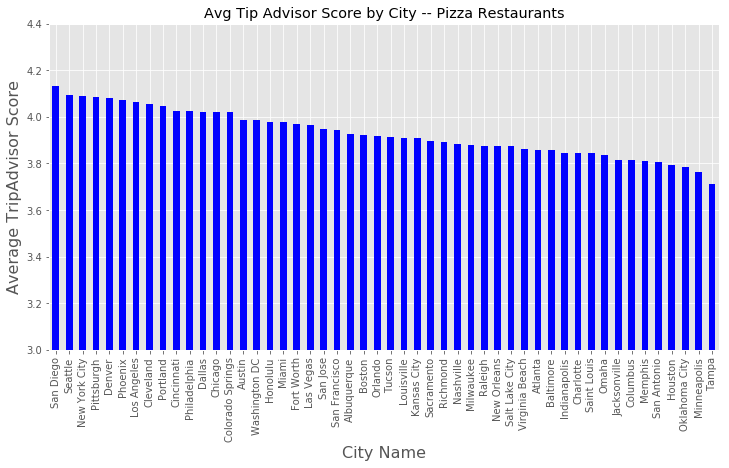

In [49]:
plt.figure(figsize=(12,6))
plt.ylim(bottom=3, top=4.4)
plt.ylabel('Average TripAdvisor Score', fontsize=16)
plt.xlabel('City Name', fontsize=16)
plt.title('Avg Tip Advisor Score by City -- Pizza Restaurants')
AvgRatingDFIndividualCities.loc['Pizza'].sort_values(ascending=False).plot.bar(color='b')

- Seafood is a little less surprising. Great in New Orleans and the coast. Terrible in Phoenix and other places in the middle of the country! Of note, I have included a statement ensuring that the number of restaurants in the cuisine/city combo is greater than 10. Without this, we might get extreme values for our average ratings.

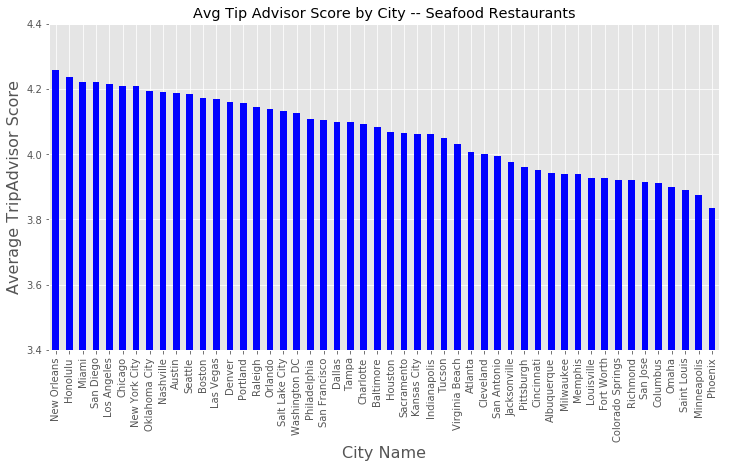

In [46]:
plt.figure(figsize=(12,6))
plt.ylim(bottom=3.4, top=4.4)
plt.ylabel('Average TripAdvisor Score', fontsize=16)
plt.xlabel('City Name', fontsize=16)
plt.title('Avg Tip Advisor Score by City -- Seafood Restaurants')
AvgRatingDFIndividualCities.loc['Seafood'].where(CountDFIndividualCities.loc['Seafood']>10).dropna().sort_values(ascending=False).plot.bar(color='b')

- Using this DF, we can take a city, and look at the relative ratings for each cuisine. This could possibly be used to identify markets that could support a new restaurant which could improve the outlook for a cuisine type in a given city. Great Latin and Mediterranean food in Boston, for example, but they could really use an improvement in BBQ and Chinese

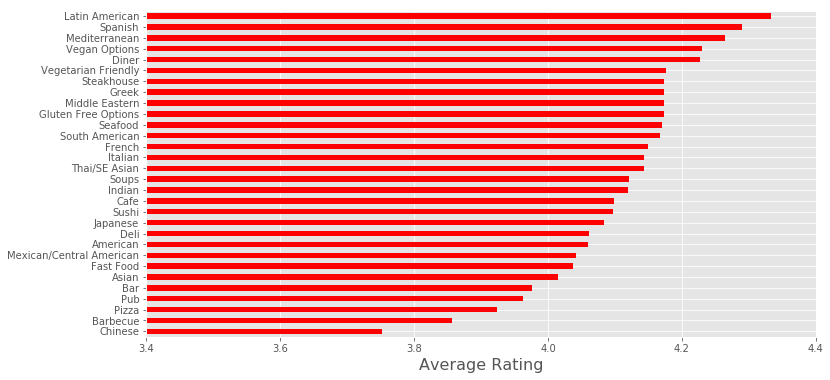

In [56]:
plt.figure(figsize=(12,6))
plt.xlim(left=3.4, right=4.4)
plt.xlabel('Average Rating', fontsize=16)
AvgRatingDFIndividualCities['Boston'].where(CountDFIndividualCities['Boston']>10).dropna().sort_values().plot.barh(color='r')

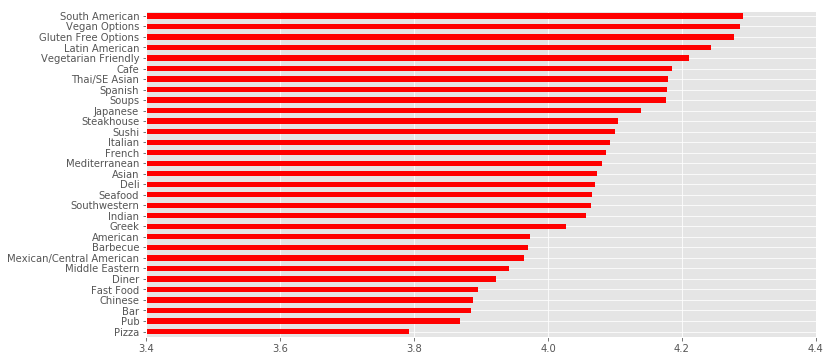

In [55]:
#Houston is ripe for a great pizza place!
plt.figure(figsize=(12,6))
plt.xlim(left=3.4, right=4.4)
AvgRatingDFIndividualCities['Houston'].where(CountDFIndividualCities['Houston']>10).dropna().sort_values().plot.barh(color='r')

In [62]:
#plt.figure(figsize=(12,6))
#y = AvgRatingDFIndividualCities['Baltimore'].sort_values(RelFreqDFIndividualCities['Baltimore'])
#y
#plt.ylabel('Cuisine', fontsize=16)
#plt.xlabel('Relative Frequency', fontsize=16)
#plt.title('Most common cuisines - Baltimore')
#RelFreqDFIndividualCities['Baltimore'].sort_values().plot.barh(color='r')

Text(0,0.5,'Average Score')

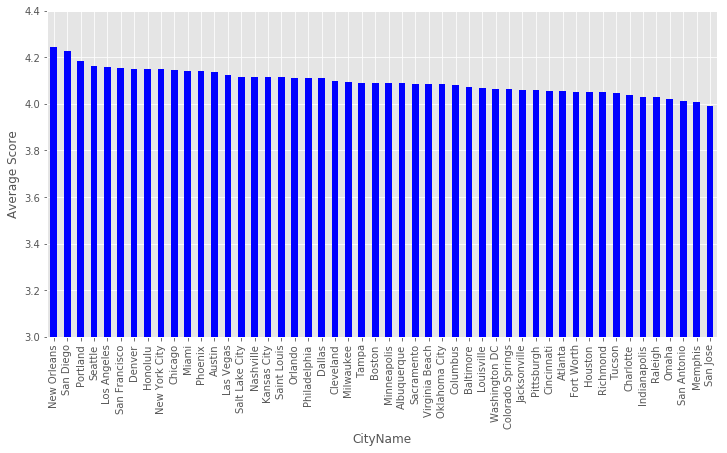

In [59]:
#What about the question of whether particular cities have higher ratings overall? We can look at this here.
plt.figure(figsize=(12,6))
plt.ylim(bottom=3, top=4.4)
Top50Finalized.groupby('CityName')['AvgRating'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Average Score')

- I was also curious, just generally, if retaurants with more ratings had a tendency to have a higher average rating. This would stand to reason, as popular restaurants (with many reviews) would likely meed to be fairly good to stay open and poopular.

([<matplotlib.axis.XTick at 0x163c39c7908>,
 <a list of 7 Text xticklabel objects>)

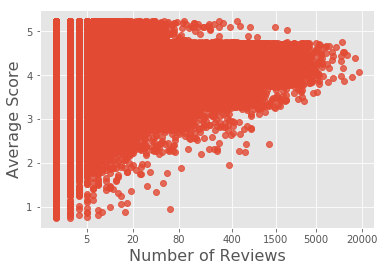

In [60]:
sns.regplot(CollapsedTop50['NumReviews'], CollapsedTop50['AvgRating'], y_jitter=0.25, fit_reg=False)
plt.ylabel('Average Score', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=16)
plt.xscale('log', basex=2)
plt.xticks([5, 20, 80, 400, 1500, 5000, 20000], [5, 20, 80, 400, 1500, 5000, 20000])

In [92]:
import scipy.stats
CollapsedTop50forLR = CollapsedTop50.query('NumReviews >= 0 and AvgRating >= 0')
len(CollapsedTop50)
len(CollapsedTop50forLR)
scipy.stats.linregress(x=CollapsedTop50forLR['NumReviews'], y=CollapsedTop50forLR['AvgRating'])

LinregressResult(slope=0.0001145164063388862, intercept=4.042931089994006, rvalue=0.059554229945411374, pvalue=2.5597107462266174e-74, stderr=6.273279155412151e-06)

- Apparently, San Diego has great pizza! A boxplot or violin plot of this does not look good, because average ratings are only given in 0.5 increments. Becuase of this, I decided to visualize it using histograms, which match perfectly to the average rating values. We can see here that San Diego does have fewer low-rated Pizza places than NY or Chicago, and the highest proportion of 5-star pizza establishments. Of note, I created a relative histogram here so that all cities would have the same total size.

In [63]:
NYCOverall = Top50Finalized[Top50Finalized['CityName']=='New York City']['AvgRating']
NYCPizza = Top50Finalized[Top50Finalized['CityName']=='New York City'][Top50Finalized['Cuisine']=='Pizza']['AvgRating']
SanDiegoOverall = Top50Finalized[Top50Finalized['CityName']=='San Diego']['AvgRating']
SanDiegoPizza = Top50Finalized[Top50Finalized['CityName']=='San Diego'][Top50Finalized['Cuisine']=='Pizza']['AvgRating']
ChicagoPizza = Top50Finalized[Top50Finalized['CityName']=='Chicago'][Top50Finalized['Cuisine']=='Pizza']['AvgRating']

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5,1,'Pizza Scores by City')

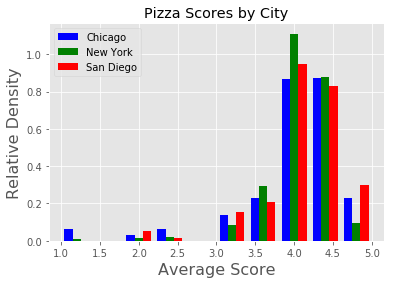

In [64]:
plt.hist([ChicagoPizza, NYCPizza, SanDiegoPizza], density=True, color=('b', 'g', 'r'))
plt.ylabel('Relative Density', fontsize=16)
plt.xlabel('Average Score', fontsize=16)
plt.legend(['Chicago', 'New York', 'San Diego'])
plt.title("Pizza Scores by City")

- We can also visualize a clear distinction among seafood restaurants in top cities (New Orleans) vs bottom cities (Phoenix), even with intermediate cities (Houston).

In [66]:
PhoenixSeafood = Top50Finalized[Top50Finalized['CityName']=='Phoenix'][Top50Finalized['Cuisine']=='Seafood']['AvgRating']
HoustonSeafood = Top50Finalized[Top50Finalized['CityName']=='Houston'][Top50Finalized['Cuisine']=='Seafood']['AvgRating']
NOSeafood = Top50Finalized[Top50Finalized['CityName']=='New Orleans'][Top50Finalized['Cuisine']=='Seafood']['AvgRating']

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Seafood Scores by City')

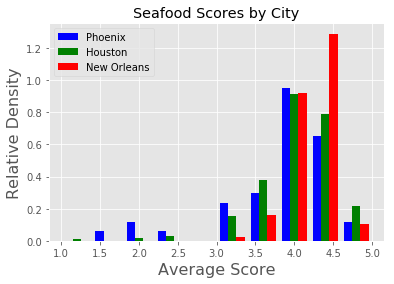

In [67]:
plt.hist([PhoenixSeafood, HoustonSeafood, NOSeafood], density=True, color=('b', 'g', 'r'))
plt.ylabel('Relative Density', fontsize=16)
plt.xlabel('Average Score', fontsize=16)
plt.legend(['Phoenix', 'Houston', 'New Orleans'])
plt.title("Seafood Scores by City")

## Development of a singular summary dataframe and export to R
- There are a few visual depictions I prefer to generate in R using ggplot2. To do this, it would be very useful to create one large dataframe containing all summary statistics and exporting this to R using JSON conversion. Let's first generate the Data Frame and then export

In [69]:
Top50Finalized['CityRestaurantTotal'] = Top50Finalized.groupby('CityName')['RestaurantName'].transform("count")
Top50Finalized['CuisineTotal'] = Top50Finalized.groupby('Cuisine')['RestaurantName'].transform("count")
Top50Finalized['CityCuisineTotal'] = Top50Finalized.groupby(['CityName', 'Cuisine'])['RestaurantName'].transform("count")
Top50Finalized['CuisineFrequency'] = Top50Finalized['CuisineTotal']/len(Top50Finalized)
Top50Finalized['CityCuisineFreq'] = Top50Finalized['CityCuisineTotal']/Top50Finalized['CityRestaurantTotal']
Top50Finalized['CityCuisineRelFreq'] = Top50Finalized['CityCuisineFreq']/Top50Finalized['CuisineFrequency']
Top50Finalized['AvgCuisineRating']= Top50Finalized.groupby('Cuisine')['AvgRating'].transform("mean")
Top50Finalized['AvgCuisineCityRtg'] = Top50Finalized.groupby(['CityName', 'Cuisine'])['AvgRating'].transform("mean")
Top50Finalized['CuisineRelativeCityRtg'] = Top50Finalized['AvgCuisineCityRtg']/Top50Finalized['AvgCuisineRating']
CityCuisineSummary = Top50Finalized.groupby(['CityName', 'Cuisine'])[['CityName', 'Cuisine', 'CityRestaurantTotal', 'CuisineFrequency', 'CuisineTotal', 'CityCuisineTotal', 'CityCuisineFreq', 'CityCuisineRelFreq', 'AvgCuisineRating', 'AvgCuisineCityRtg', 'CuisineRelativeCityRtg']].mean()
CityCuisineSummary = CityCuisineSummary.reset_index()
CityCuisineSummary.head(10)

CityName    Cuisine  CityRestaurantTotal  CuisineFrequency  \
0  Albuquerque   American                 2251          0.156024   
1  Albuquerque      Asian                 2251          0.052870   
2  Albuquerque        Bar                 2251          0.062350   
3  Albuquerque   Barbecue                 2251          0.011786   
4  Albuquerque       Cafe                 2251          0.022845   
5  Albuquerque  Caribbean                 2251          0.002166   
6  Albuquerque    Chinese                 2251          0.028794   
7  Albuquerque       Deli                 2251          0.009553   
8  Albuquerque      Diner                 2251          0.008619   
9  Albuquerque  Fast Food                 2251          0.032695   

   CuisineTotal  CityCuisineTotal  CityCuisineFreq  CityCuisineRelFreq  \
0         27879               330         0.146602            0.939608   
1          9447               121         0.053754            1.016721   
2         11141                95         0.042203            0.676877   
3          2106                23         0.010218            0.866921   
4          4082                51         0.022657            0.991762   
5           387                 5         0.002221            1.025579   
6          5145                67         0.029765            1.033712   
7          1707                22         0.009773            1.023056   
8          1540                24         0.010662            1.237088   
9          5842                91         0.040426            1.236488   

   AvgCuisineRating  AvgCuisineCityRtg  CuisineRelativeCityRtg  
0          4.058054           3.990909                0.983454  
1          4.095057           4.111570                1.004033  
2          4.008392           3.868421                0.965080  
3          4.065527           4.021739                0.989229  
4          4.228442           4.264706                1.008576  
5          4.192506           4.400000                1.049492  
6          3.830612           3.805970                0.993567  
7          4.150557           4.000000                0.963726  
8          4.051623           3.979167                0.982117  
9          4.001369           4.049451                1.012016

- Finally, let's export this data  to R by creating a CSV object!

In [80]:
#CityCuisineSummary.to_csv("CityCuisineSummary.csv") (commented out)